# Introduction

The following Exploratory Data Analysis (EDA) is intended to provide insight into the distributions and possible patterns in the data.

# Import Libraries and Other Code

In [65]:
# Relevant Libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import re

# Load Dataset and First Exploration

In [16]:
# Loading dataset

PlantGrowth_Dataset = pd.read_csv("plant_growth_data.csv")

print(f'Dataset shape is: {PlantGrowth_Dataset.shape}')

# Example of records
PlantGrowth_Dataset.head(5)

Dataset shape is: (193, 7)


,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


In [8]:
# Data types of variables

PlantGrowth_Dataset.dtypes

Soil_Type            object
Sunlight_Hours      float64
Water_Frequency      object
Fertilizer_Type      object
Temperature         float64
Humidity            float64
Growth_Milestone      int64
dtype: object

In [10]:
# Splitting variables into numerical and categorical

labels_variables = PlantGrowth_Dataset.columns

Features = labels_variables[:-1]
Target = labels_variables[-1]

NumericalFeatures , CategoricalFeatures = [] , []
for feature in Features:
    if PlantGrowth_Dataset[feature].dtype == 'object':
        CategoricalFeatures.append(feature)
    else:
        NumericalFeatures.append(feature)

In [ ]:
# Basic descriptive : Numerical features

PlantGrowth_Dataset[NumericalFeatures].describe()

,Sunlight_Hours,Temperature,Humidity
count,193.000000,193.000000,193.000000
mean,6.826484,25.076087,58.098927
std,1.599509,5.354170,12.631799
min,4.033133,15.200000,30.567682
25%,5.477000,20.637095,49.300000
50%,6.833290,25.912336,59.182806
75%,8.241144,29.757938,69.100000
max,9.913903,34.810103,79.648240


In [14]:
# Basic descriptive : Categorical features

PlantGrowth_Dataset[CategoricalFeatures].describe()

,Soil_Type,Water_Frequency,Fertilizer_Type
count,193,193,193
unique,3,3,3
top,clay,daily,none
freq,67,74,74


# Distribution of Features

## Numerical Features

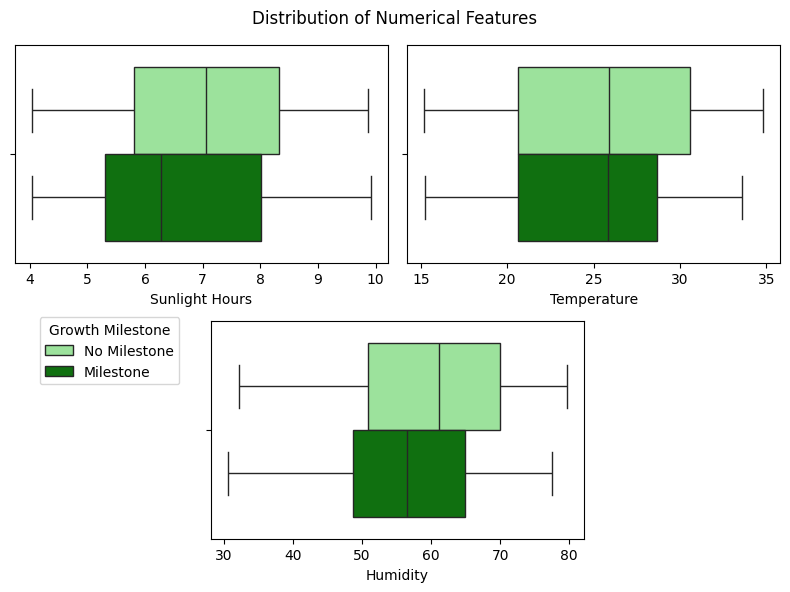

In [ ]:
mosaic_grid = "1122\n.33."
fig , axes = plt.subplot_mosaic(mosaic_grid,figsize=(8,6),layout='tight')

for index_axes , numerical_feature in enumerate(NumericalFeatures,1):
    axes_plot = axes[str(index_axes)]
    sns.boxplot(PlantGrowth_Dataset,x=numerical_feature,hue=Target,palette=['lightgreen','green'],ax=axes_plot,legend=False)
    axes_plot.set_xlabel(re.sub(r'_',' ',numerical_feature))

fig.suptitle('Distribution of Numerical Features')
fig.legend(title='Growth Milestone',labels=['No Milestone','Milestone'],loc=(0.05,0.35));

## Categorical Features

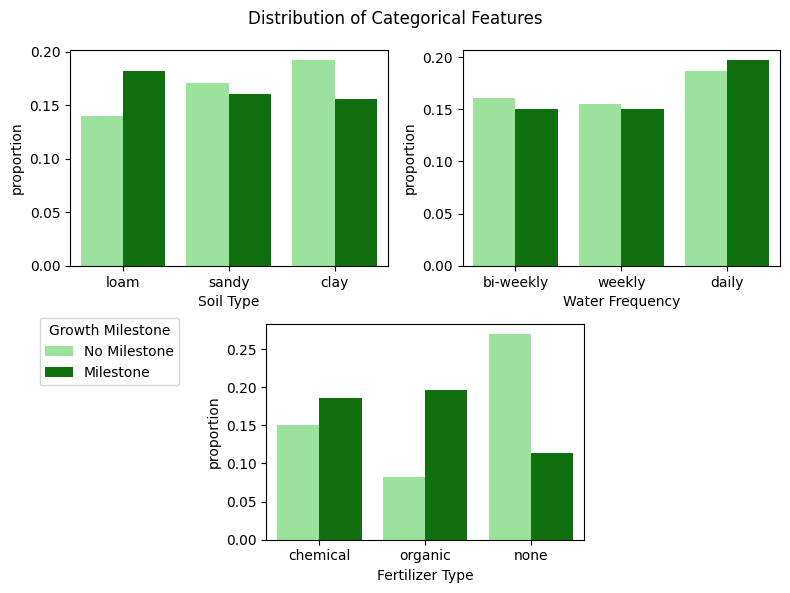

In [91]:
mosaic_grid = "1122\n.33."
fig , axes = plt.subplot_mosaic(mosaic_grid,figsize=(8,6),layout='tight')

for index_axes , categorical_feature in enumerate(CategoricalFeatures,1):
    axes_plot = axes[str(index_axes)]
    sns.countplot(PlantGrowth_Dataset,x=categorical_feature,hue=Target,stat='proportion',palette=['lightgreen','green'],ax=axes_plot,legend=False)
    axes_plot.set_xlabel(re.sub(r'_',' ',categorical_feature))

fig.suptitle('Distribution of Categorical Features')
fig.legend(title='Growth Milestone',labels=['No Milestone','Milestone'],loc=(0.05,0.35));